In [1]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
%matplotlib inline


In [3]:
############ Test dataset
test_data = pd.read_csv('Test.csv')
test_data.head(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26


In [4]:
########### Rider dataset

riders = pd.read_csv('Riders.csv')
riders.head(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466


In [5]:
########### Train dataset
train_data = pd.read_csv('Train.csv')
train_data.head(3)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455


In [6]:
######### merging datasets

#                                 TEST
df2 = d = pd.merge(test_data,riders,on = 'Rider Id',how='left')


#                                 TRAIN
df = pd.merge(riders,train_data,on = 'Rider Id',how='left')



In [ ]:
plt.plot(df)

In [7]:
df.head(3)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,...,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,Rider_Id_396,2946,2298,14.0,1159,Order_No_19506,User_Id_2746,Bike,1.0,Personal,...,2.0,11:21:33 AM,4.0,21.7,NaN,-1.278450,36.798173,-1.278948,36.812236,491.0
1,Rider_Id_396,2946,2298,14.0,1159,Order_No_14309,User_Id_1792,Bike,3.0,Business,...,5.0,11:07:26 AM,3.0,24.4,NaN,-1.280912,36.785252,-1.273431,36.786378,482.0
2,Rider_Id_479,360,951,13.5,176,Order_No_5471,User_Id_2162,Bike,3.0,Business,...,1.0,2:55:53 PM,12.0,20.3,NaN,-1.256624,36.870685,-1.261589,36.792873,1967.0


In [8]:
"""          
   Dropping vehicle type because it is always a bike
"""

def drop_vehicle_type(input_df):
    input_df = input_df.drop(["Vehicle Type"], axis=1)
    return input_df
    


In [9]:
df = drop_vehicle_type(df)                   # TRAIN DATA
df2 = drop_vehicle_type(df2)                  # TEST DATA

# Assigning features and predictor variables

In [10]:
#                               TRAIN DATA
X = df.drop(["Time from Pickup to Arrival"],axis=1)
y = df.iloc[:,-1].values

In [11]:
"""
   Dropping these features because the test data does not contain them

"""

X = X.drop(['Arrival at Destination - Day of Month','Arrival at Destination - Weekday (Mo = 1)',
           'Arrival at Destination - Time'], axis=1)

In [12]:
#                                TEST DATA
X_pred = df2.iloc[:,:]

# Dealing with missing values

In [13]:
"""
   PREDICTION VARIABLE
   Dropping missing values for Time from Pickup to Arrival
"""
y = y[~np.isnan(y)]

In [14]:
"""
   PRECIPITATION
   Missing values will be replaced with 0. The zero will mean that there was no precipitation 
   during that day.
"""

X["Precipitation in millimeters"] = X["Precipitation in millimeters"].fillna(0)  #TRAIN DATA
X_pred["Precipitation in millimeters"] = X_pred["Precipitation in millimeters"].fillna(0)  #TEST DATA


In [15]:
"""
   TEMPERATURE
   Filling NaN values with the mean of the column
"""

def impute_mean(series):
    return series.fillna(series.mean())                       


In [16]:
X["Temperature"] = round(X.Temperature.transform(impute_mean),1)     # TRAIN DATA

In [17]:
X_pred["Temperature"] = round(X_pred.Temperature.transform(impute_mean),1)      # TEST DATA

In [18]:
"""
   Drop the riders from the Rider dataset who do not have information on the train data and test data
   Number of rows will go from 21237 to 21201 in train dataset
   Number of rows will go from 7206 to 7068 in test dataset
"""

def drop_nan_rows(input_df):
    input_df = input_df.dropna(how='any', subset=['User Id'])
    return input_df

In [19]:
X = drop_nan_rows(X)                    # TRAIN DATA
X_pred = drop_nan_rows(X_pred)                   # TEST DATA

# Categorising data and encoding it

In [20]:
"""
   RIDER ID
   
   Creating a count variable that counts the number of times each rider ID appeArs,
   then breaking the counts values into categorical values to reduce the number of dummy variables
"""


                                                  
                        # TRAIN DATA
X["Counts"] = X.groupby("Rider Id")["Order No"].transform('count')
X["Is_rider_busy"] = X["Counts"].apply(lambda x: 1 if x >= 50 else 0)


                        # TEST DATA
X_pred["Counts"] = X_pred.groupby("Rider Id")["Order No"].transform('count')
X_pred["Is_rider_busy"] = X_pred["Counts"].apply(lambda x: 1 if x >= 50 else 0)



In [21]:
"""
   Dropping the counts and Rider Id columns, after utilizing them
"""

X = X.drop(["Rider Id","Counts"],axis = 1)              # TRAIN DATA
X_pred = X_pred.drop(["Rider Id","Counts"],axis = 1)    # TEST DATA


In [22]:
"""
  USER  ID
  
  Doing the same method we did for the rider ID variable to reduce the number of dummy variables
  A user will be a frequent user if they are returning for the second time or more,
  if a user appears once on the list, they are regarded as non-frequent
"""

def user_id_cat(input_df):
    input_df["Counts"] = input_df.groupby("User Id")["Order No"].transform('count')

    input_df["Is_user_frequent"] = input_df["Counts"].apply(lambda x: "Frequent" if x >= 135 
                                   else "Moderate" if 10 < x < 135 
                                   else  "Occasional" )
    return input_df

In [23]:
X = user_id_cat(X)                   # TRAIN DATA
X_pred = user_id_cat(X_pred)         # TEST DATA

In [24]:
"""
   Dropping the counts and User Id columns, after utilizing them
"""
X = X.drop(["User Id","Counts"],axis = 1)               # TRAIN DATA
X_pred = X_pred.drop(["User Id","Counts"],axis = 1)     # TEST DATA    


In [25]:
"""
  PLATFORM TYPE
  
  Because on platform type 3 was used for approximately 85.16% of the orders placed in the dataset, it will be regarded as the
  busiest platform, and the others will be regarded as not busy.
"""

def platfor_type(input_df):
    input_df["Is_platform_busy"] = input_df["Platform Type"].apply(lambda x: 1 if x == 3 
                                   else 0)
    return input_df

In [26]:
X = platfor_type(X)                   # TRAIN DATA
X_pred = platfor_type(X_pred)         # TEST DATA

In [27]:
"""
   Dropping Platform Type column after utilizing it
"""
X = X.drop(["Platform Type"],axis = 1)               # TRAIN DATA
X_pred = X_pred.drop(["Platform Type"],axis = 1)     # TEST DATA    

In [28]:
"""
   DAY OF THE MONTH
   
   The value counts for confirmation, placement,pickup and arrival at pickup day of the month are the same.
   One Day Of The Month column will be created to specify which of the month it is.
"""

#Train data
X['Day_of_Month'] = X['Placement - Day of Month'].apply(lambda x: "Beginning" if 1 <= x < 12
                                   else "Mid" if 13 <= x <= 25
                                   else "End_month")
X = X.drop(['Placement - Day of Month','Confirmation - Day of Month','Arrival at Pickup - Day of Month',
            'Pickup - Day of Month'], axis=1)

#Test data
X_pred['Day_of_Month'] = X_pred['Placement - Day of Month'].apply(lambda x: "Beginning" if 1 <= x < 12
                                   else "Mid" if 13 <= x <= 25
                                   else "End_month")
X_pred = X_pred.drop(['Placement - Day of Month','Confirmation - Day of Month','Arrival at Pickup - Day of Month',
            'Pickup - Day of Month'], axis=1)

In [29]:
"""
   WEEKDAYS
   
   The value counts for the weekday variables for placement weekday, confirmation weekday, pickup weekday and arrival
   at pickup weekday are the same. One categorical weekday column will be created specifying which days of the week
   it is.
"""
#Train data
X['Day_of_Week'] = X['Pickup - Weekday (Mo = 1)'].apply(lambda x: "Monday" if x == 1.0 
                                   else "Mid_week" if 1.0 < x <= 4.0 
                                   else  "Friday" if x == 5.0
                                   else "Weekend")
X = X.drop(['Placement - Weekday (Mo = 1)','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Weekday (Mo = 1)',
           'Pickup - Weekday (Mo = 1)'], axis=1)

#Test data
X_pred['Day_of_Week'] = X_pred['Pickup - Weekday (Mo = 1)'].apply(lambda x: "Monday" if x == 1.0 
                                   else "Mid_week" if 1.0 < x <= 4.0 
                                   else  "Friday" if x == 5.0
                                   else "Weekend")
X_pred = X_pred.drop(['Placement - Weekday (Mo = 1)','Confirmation - Weekday (Mo = 1)','Arrival at Pickup - Weekday (Mo = 1)',
           'Pickup - Weekday (Mo = 1)'], axis=1)

In [30]:
"""
   ORDER NO
   
   Dropping Order No column because  it is unique for every row
"""
X = X.drop(["Order No"],axis=1)                        # TRAIN DATA
X_pred = X_pred.drop(["Order No"],axis=1)              # TEST DATA

In [31]:
"""
   Making sure column naming is consistent by replacing whitespaces with an underscore
"""

X.columns = [col.replace(" ","_") for col in X.columns]                   # TRAIN DATA
X_pred.columns = [col.replace(" ","_") for col in X_pred.columns]         # TEST DATA 

# Encoding features

In [32]:
objList = X.select_dtypes(include = "object").columns            #finding features with type object
objList
excluding_time = ['Personal_or_Business','Is_user_frequent']


In [33]:
X.head()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Personal_or_Business,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Distance_(KM),...,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Is_rider_busy,Is_user_frequent,Is_platform_busy,Day_of_Month,Day_of_Week
0,2946,2298,14.0,1159,Personal,10:41:49 AM,10:43:49 AM,11:05:49 AM,11:13:22 AM,4.0,...,0.0,-1.278450,36.798173,-1.278948,36.812236,0,Occasional,0,Beginning,Mid_week
1,2946,2298,14.0,1159,Business,10:38:29 AM,10:39:10 AM,10:54:14 AM,10:59:24 AM,3.0,...,0.0,-1.280912,36.785252,-1.273431,36.786378,0,Moderate,1,End_month,Friday
2,360,951,13.5,176,Business,1:38:41 PM,1:44:38 PM,2:08:57 PM,2:23:06 PM,12.0,...,0.0,-1.256624,36.870685,-1.261589,36.792873,0,Occasional,1,Beginning,Monday
3,360,951,13.5,176,Business,3:02:30 PM,3:11:55 PM,3:20:12 PM,3:24:26 PM,5.0,...,0.0,-1.300406,36.829741,-1.307787,36.844321,0,Moderate,1,Beginning,Mid_week
4,360,951,13.5,176,Personal,10:38:28 AM,10:45:48 AM,11:04:07 AM,11:09:49 AM,6.0,...,0.0,-1.292206,36.800284,-1.300921,36.828195,0,Occasional,0,Beginning,Mid_week


In [34]:
X_pred = pd.get_dummies(X_pred, columns=excluding_time,drop_first = True)

In [35]:
X = pd.get_dummies(X, columns=excluding_time,drop_first = True)

# Checking for Linearity

In [36]:
y_dataframe = {"Time_of_arrival":y}
y_ = pd.DataFrame(y_dataframe) 
df_train = X.merge(y_,left_index=True,right_index=True)

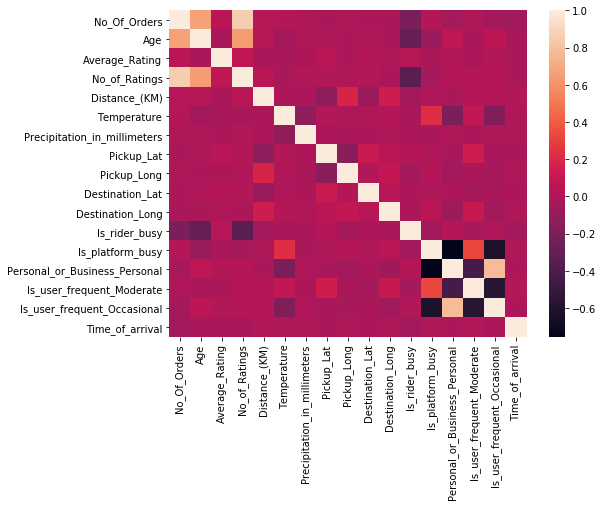

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(8,6))
cor = df_train.corr()
sns.heatmap(cor)

In [38]:
#Backward elimination

In [39]:
# dropping to test the models
X = X.drop(['Placement_-_Time','Confirmation_-_Time','Arrival_at_Pickup_-_Time',
                       'Pickup_-_Time','Day_of_Month','Day_of_Week'],axis = 1)


In [40]:
X_pred = X_pred.drop(['Placement_-_Time','Confirmation_-_Time','Arrival_at_Pickup_-_Time',
                       'Pickup_-_Time','Day_of_Month','Day_of_Week'],axis = 1)


In [41]:
import statsmodels.api as sm

#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['No_Of_Orders', 'Average_Rating', 'No_of_Ratings', 'Distance_(KM)', 'Temperature', 'Pickup_Long', 'Destination_Lat', 'Is_rider_busy', 'Is_platform_busy', 'Is_user_frequent_Moderate', 'Is_user_frequent_Occasional']


# Checking for Multicollinearity

In [42]:
X_plot = X[selected_features_BE]

In [43]:
corr = X_plot.corr()

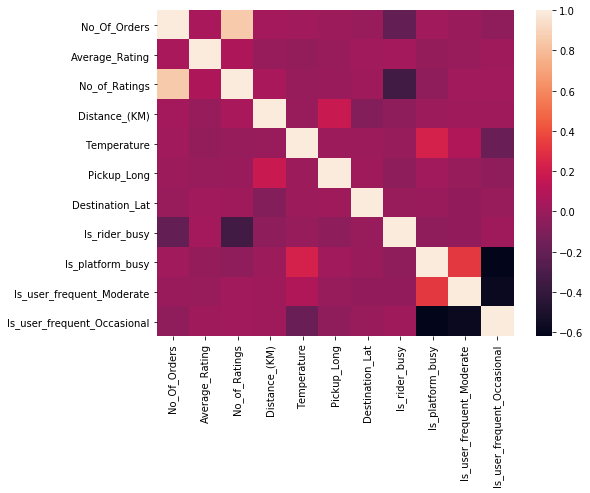

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(corr)



In [45]:
"""
   Dropping features because they are highly correlated with other features
"""

selected_features = [x for x in selected_features_BE if x != 'No_of_Ratings' and x != 'Is_user_frequent_Moderate']

# Feature Scaling

In [46]:
X_copy_scaling = X[selected_features]
X_pred_scaling = X_pred[selected_features]


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_copy_scaling.iloc[:,0:6]= sc.fit_transform(X_copy_scaling.iloc[:,0:6])
X_pred_scaling.iloc[:,0:6]= sc.fit_transform(X_pred_scaling.iloc[:,0:6])

C:\Users\Percy P\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Percy P\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
X_copy_scaling.head(4)

,No_Of_Orders,Average_Rating,Distance_(KM),Temperature,Pickup_Long,Destination_Lat,Is_rider_busy,Is_platform_busy,Is_user_frequent_Occasional
0,0.796290,0.128247,-0.971370,-0.486458,-0.349349,0.104332,0,0,1
1,0.796290,0.128247,-1.147774,0.351538,-0.694156,0.262752,0,1,0
2,-0.846375,-0.417575,0.439856,-0.920975,1.585758,0.602825,0,1,1
3,-0.846375,-0.417575,-0.794967,0.475685,0.493103,-0.723839,0,1,0


# Splitting the dataset into the Training set and Test set


In [49]:
######################        Crossvalidation

In [50]:
from sklearn.model_selection import KFold 

In [51]:
X_copy_split = X_copy_scaling.copy()

In [52]:
X_array = np.array(X_copy_split)
X_array

array([[ 0.79628994,  0.12824671, -0.97137039, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.79628994,  0.12824671, -1.14777366, ...,  0.        ,
         1.        ,  0.        ],
       [-0.84637496, -0.41757544,  0.43985579, ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.86034968,  0.56490442, -0.08935403, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86034968,  0.56490442,  0.43985579, ...,  0.        ,
         1.        ,  0.        ],
       [-0.97405309,  1.21989099,  0.43985579, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
kf = KFold(n_splits=4) # Define the split - into 4 folds 
kf.get_n_splits(X_array)

train_tuples = []
test_tuples = []

for train_index, test_index in kf.split(X_array ):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y[train_index], y[test_index]
    train_tuples.append((X_train,y_train))
    test_tuples.append((X_test,y_test))
    

# Testing models

In [54]:
names = ['RandForest(default auto)','RandForest(auto, depth=11)',
         'RandForest(sqrt,depth=11)','RandForest(log2,depth=11)','GradientBoostingRegressor(default auto)','GradientBoostingRegressor(depth=5,auto)',
         'GradientBoostingRegressor(depth=5,sqrt)','GradientBoostingRegressor(depth=5,log2)',
         'DecisionTreeRegressor(default)',
         'DecisionTreeRegressor(depth=5,auto)','DecisionTreeRegressor(depth=5,sqrt)',
         'Multiple Linear Regression', 'Rigde' ]
         
    
regressors = [
        RandomForestRegressor(max_features='auto'),               RandomForestRegressor(max_depth=11),
        RandomForestRegressor(max_depth=11, max_features='sqrt'), RandomForestRegressor(max_depth=11, max_features='log2'),
        GradientBoostingRegressor(max_features='auto'),           GradientBoostingRegressor(max_depth=5,max_features='auto'),
        GradientBoostingRegressor(max_depth=5,max_features='sqrt'),GradientBoostingRegressor(max_depth=5,max_features='log2'),
        DecisionTreeRegressor(max_depth=5),                       DecisionTreeRegressor(max_depth=5,max_features='auto'),
        DecisionTreeRegressor(max_depth=5,max_features='sqrt'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
        Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='auto', tol=0.001)]
    
    

In [55]:
Model_Performance=pd.DataFrame()

for (X_train,y_train) in train_tuples:
    for name, regr in zip(names, regressors):
        regr.fit(X_train,y_train)
        score = regr.score(X_train,y_train)
        rmse = np.sqrt(mean_squared_error(y_train, regr.predict(X_train),multioutput='raw_values'))
        cv= pd.Series([name,score,rmse],index=['name','score','RMSE'])
        Model_Performance= Model_Performance.append(cv,ignore_index=True)


In [56]:
"""
   RMSE and scores for all n splits 
"""

Model_Performance.head(13) 

,RMSE,name,score
0,[295.6608237274165],RandForest(default auto),0.908934
1,[619.4679678715256],"RandForest(auto, depth=11)",0.600232
2,[653.8793897029751],"RandForest(sqrt,depth=11)",0.554584
3,[656.0980463071324],"RandForest(log2,depth=11)",0.551556
4,[751.0131693092785],GradientBoostingRegressor(default auto),0.412422
5,[693.0547582589096],"GradientBoostingRegressor(depth=5,auto)",0.499613
6,[703.8831642498218],"GradientBoostingRegressor(depth=5,sqrt)",0.483855
7,[704.5611317385335],"GradientBoostingRegressor(depth=5,log2)",0.482860
8,[784.6710961676848],DecisionTreeRegressor(default),0.358575
9,[784.6710961676848],"DecisionTreeRegressor(depth=5,auto)",0.358575


# Training model with the best rmse from above

In [57]:
"""
   Random Forest Regression performed well on all four splits of the train data sets,
   so we will be proceeding with it to predict the time of arrival.
"""
model_kfold = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [58]:
rmse = []

pred = pd.DataFrame()

for (X_train,y_train) in train_tuples:
    model_kfold.fit(X_train,y_train)  #training model
    

for (X_test,y_test)in test_tuples:
    y_pred = model_kfold.predict(X_test)      # Get predictions
    
    np.set_printoptions(precision=2)
    Predict_test = pd.DataFrame(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1), columns = ['Predict', 'Test'])
    
    pred.append(Predict_test,ignore_index=True)
    
    RMSE = mean_squared_error(y_pred, y_test)**0.5       # Compute RMSE
    
    rmse.append(RMSE)
    

In [59]:
rmse

[695.132786905359, 660.0384311342614, 703.8641121442146, 810.5500626392371]

In [60]:
errors2 = np.array(y_pred - y_test)

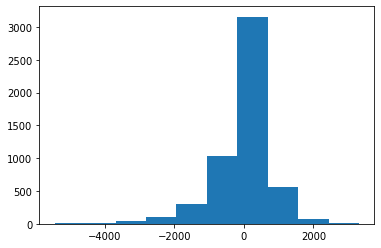

In [61]:
plt.hist(errors2)
plt.show()

# Predicting the Test set results

In [62]:

Time_from_pickup_to_Arrival = model_kfold.predict(X_pred_scaling)


In [64]:
import pickle
save_path = 'team17.plk'
pickle.dump(model_kfold, open(save_path, 'wb'))

In [173]:
SampleSubmission = pd.read_csv(r'C:\Users\27817\OneDrive\Desktop\Predict\SampleSubmission.csv')

In [174]:
SampleSubmission['Time from Pickup to Arrival'] = Time_from_pickup_to_Arrival
SampleSubmission.to_csv(r'C:\Users\27817\OneDrive\Desktop\Predict\RFR4.csv',index=False)

In [175]:
SampleSubmission['Time from Pickup to Arrival']

0       1663.196280
1       1219.515380
2       1507.196467
3       1396.626209
4       1187.735615
           ...     
7063    1454.586127
7064    2811.902688
7065    1672.440080
7066    2576.702114
7067    1589.398726
Name: Time from Pickup to Arrival, Length: 7068, dtype: float64